In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class LinearRegression:
    def __init__(self) -> None:
        self.w = 0
        self.b = 0

    def fit(self, X_train, y_train):
        self.w = np.sum(
            (X_train - X_train.mean()) * (y_train - y_train.mean())
        ) / np.sum(np.pow(X_train - X_train.mean(), 2))

        self.b = y_train.mean() - X_train.mean() * self.w

    def predict(self, X_test):
        return self.w * X_test.values + self.b

    @property
    def _coef(self):
        return self.w

    @property
    def _intercept(self):
        return self.b

In [3]:
df = pd.read_csv("dataset/package.csv")
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   cgpa     200 non-null    float64
 1   package  200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


<Axes: xlabel='cgpa', ylabel='package'>

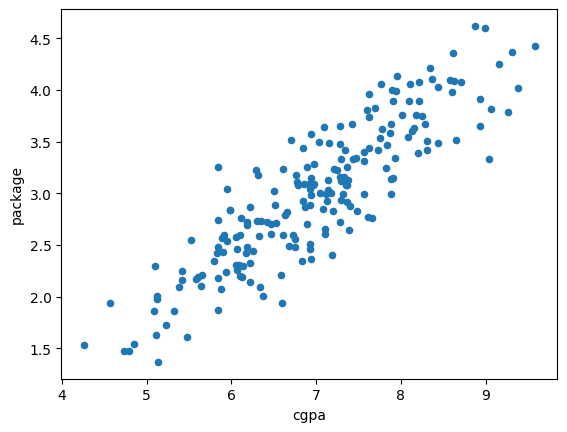

In [5]:
df[["cgpa", "package"]].plot(x="cgpa", y="package", kind="scatter")

In [6]:
lr = LinearRegression()
X = df["cgpa"]
y = df["package"]

In [7]:
lr.fit(X, y)

In [8]:
lr._coef, lr._intercept

(np.float64(0.5695912947937536), np.float64(-0.9856779462557346))

In [9]:
df["package_pred"] = lr.predict(df["cgpa"])

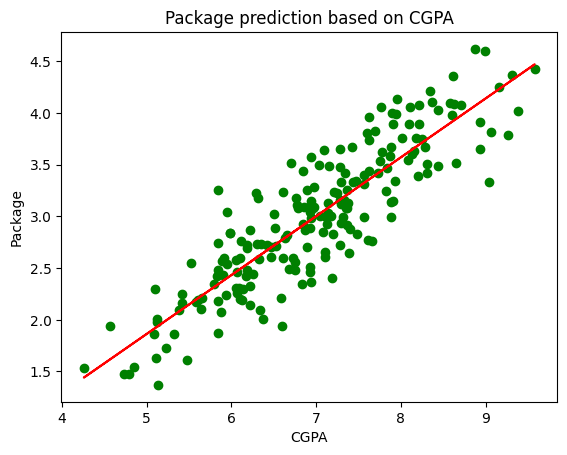

In [10]:
plt.scatter(df["cgpa"], df["package"], color="green")
plt.plot(df["cgpa"], df["package_pred"], color="red")
plt.title("Package prediction based on CGPA")
plt.xlabel("CGPA")
plt.ylabel("Package")
plt.show()